# **Regression Multiple**

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sp 
import scipy.stats
import statsmodels.api as sm
import pandas_datareader as pdr
import warnings
warnings.filterwarnings('ignore')


In [140]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv('housing.csv',delimiter = r"\s+",header=None,names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [141]:
df.shape

(506, 14)

In [142]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [143]:
df_bmi=pd.read_csv('bmi.csv')
df_bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [144]:
df_bmi['Gender']=df_bmi['Gender'].map({'Male':0,'Female':1})
df_bmi.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [145]:
df_bmi.shape

(500, 4)

In [146]:
df_bmi.describe()

,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.510000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,1.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


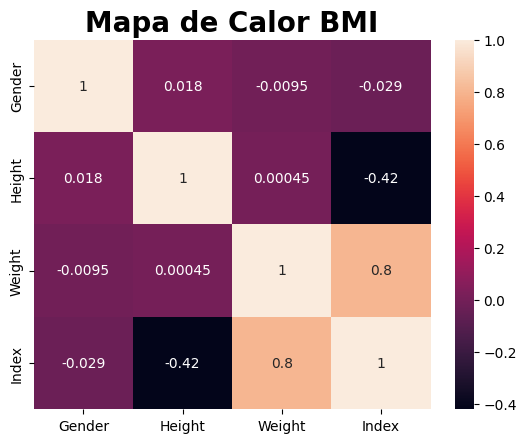

In [147]:
sns.heatmap(df_bmi.corr(),annot=True)
plt.title('Mapa de Calor BMI',fontsize=20,weight='bold')
plt.show()

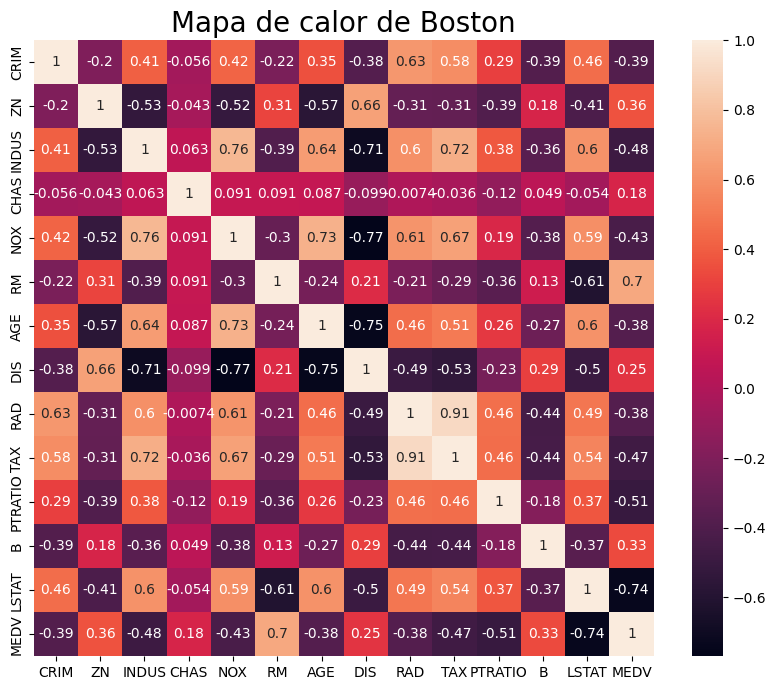

In [148]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Mapa de calor de Boston',fontsize=20)
plt.show()

<Figure size 400x400 with 0 Axes>

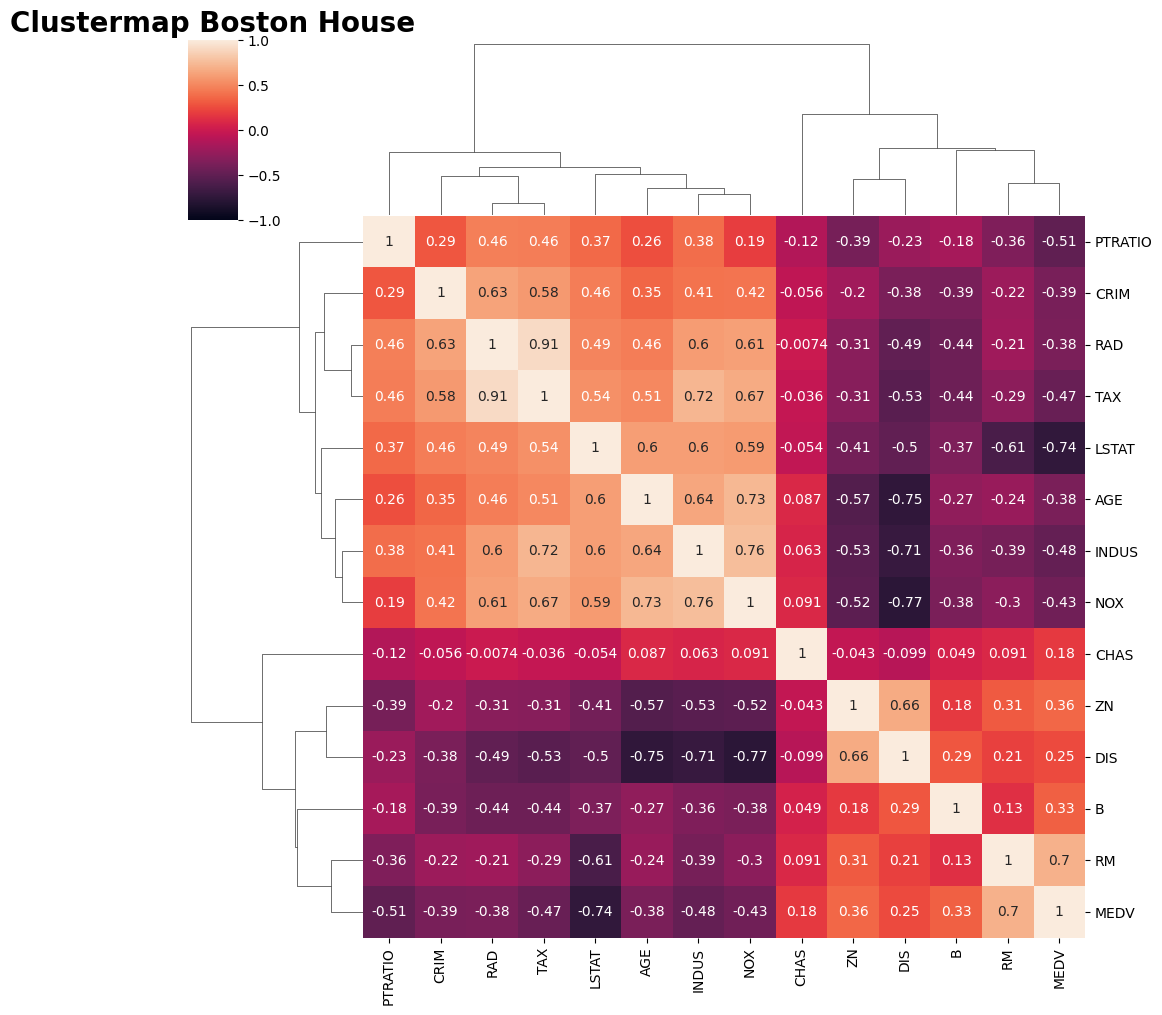

In [149]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(df.corr(), vmin = -1, vmax = 1, annot = True)
plt.title('Clustermap Boston House',fontsize =20,weight ='bold')
plt.show()

**Database Multicolinearidad**

In [150]:
df_bmi.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
X=df_bmi[['Gender', 'Height', 'Weight']]
vif_data=pd.DataFrame()
vif_data["Feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

  Feature        VIF
0  Gender   2.028864
1  Height  11.623103
2  Weight  10.688377


In [153]:
# the independent variables set
X2 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2_data)

    Feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


In [154]:
vif2_data.columns

Index(['Feature', 'VIF'], dtype='object')

In [155]:
vif2_data.sort_values(by=['VIF'],ascending=False)

,Feature,VIF
10,PTRATIO,85.029547
5,RM,77.948283
4,NOX,73.894947
9,TAX,61.227274
6,AGE,21.386850
11,B,20.104943
8,RAD,15.167725
7,DIS,14.699652
2,INDUS,14.485758
12,LSTAT,11.102025


In [156]:
X2 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']]

vif2_data=pd.DataFrame()
vif2_data['Feature']=X2.columns
vif2_data['VIF']=[variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

vif2_data.sort_values(by=['VIF'],ascending=False)

,Feature,VIF
4,NOX,73.894171
5,RM,60.598846
9,TAX,59.301541
6,AGE,21.361234
10,B,18.614751
8,RAD,15.159162
2,INDUS,14.275283
7,DIS,12.221605
11,LSTAT,10.138324
1,ZN,2.451624


**The last step requires 7 features**

In [157]:
# the independent variables set
X2 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

vif2_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
2,INDUS,6.900077
6,LSTAT,6.726973
5,RAD,4.678181
4,DIS,3.968908
1,ZN,2.299351
0,CRIM,2.067135
3,CHAS,1.086574


In [158]:
df_copy=df.copy()
from sklearn.preprocessing import StandardScaler

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features =  df_copy[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_copy[col_names] = features

In [159]:
features

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [160]:
X=df_copy.iloc[:,:-1].values
y=df_copy.iloc[:,-1].values

## **Linear Regression**

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [162]:
from sklearn.linear_model import LinearRegression
# Creating and training model
lm=LinearRegression()
lm.fit(X_train,y_train)
# Model making a prediction on test data
y_pred=lm.predict(X_test)

In [163]:
y_pred

array([34.32560931, 31.2633507 , 22.28003335, 17.86975069, 20.40606949,
       25.91303352, 26.15242179, 23.66375418, 22.30169002, 19.59234366,
       26.75489062, 17.29420545, 20.80817579, 15.46781924, 41.69247941,
       20.16746428, 28.77029186, 19.02021072, 32.38988683, 40.43872985,
       35.04799251, 16.83853764, 20.33053373, 18.09797446, 13.80644424,
       12.41884725, 27.47062888, 20.40507455, 18.75428942, 20.25662126,
       15.46268828, 24.40432932, 39.15237132, 24.76295642, 31.78210045,
       28.38346572, 15.00749275, 14.45446654, 16.73702223, 23.29876692,
       22.95875889, 23.59744316, 13.77412361, 21.39735646, 31.29998733,
       26.66234266, 19.32157368, 15.87491845, 17.2294449 , 12.65256962,
       21.71569722, 20.1686083 , 23.61536492, 24.10587542, 11.97825659,
       14.74341261, 24.86442941, 34.10640748, 10.12033231, 20.89367197,
       17.54551737, 19.5997927 , 17.74536973, 30.04265302, 21.0171677 ,
       25.35489057, 15.73563341, 25.06394771, 22.10298887, 20.65

In [164]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [165]:
# Predicting cross validation score
cv_lm=cross_val_score(estimator=lm,X=X_train,y=y_train,cv=10)
# Adjuted R-Squared
r2 = lm.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# Adjusted R-squared formula
lm_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm_R2 = lm.score(X_test, y_test)
lmCV_R2 = cv_lm.mean()

In [166]:
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm.score(X_test, y_test),3) *100, '%')
print('Adjusted R2:', round(lm_adjusted_r2, 3) *100, '%')
print("Cross Validated R2: ", round( cv_lm.mean(),3) *100, '%')

RMSE: 5.2128
R2: 72.5 %
Adjusted R2: 69.3 %
Cross Validated R2:  69.3 %


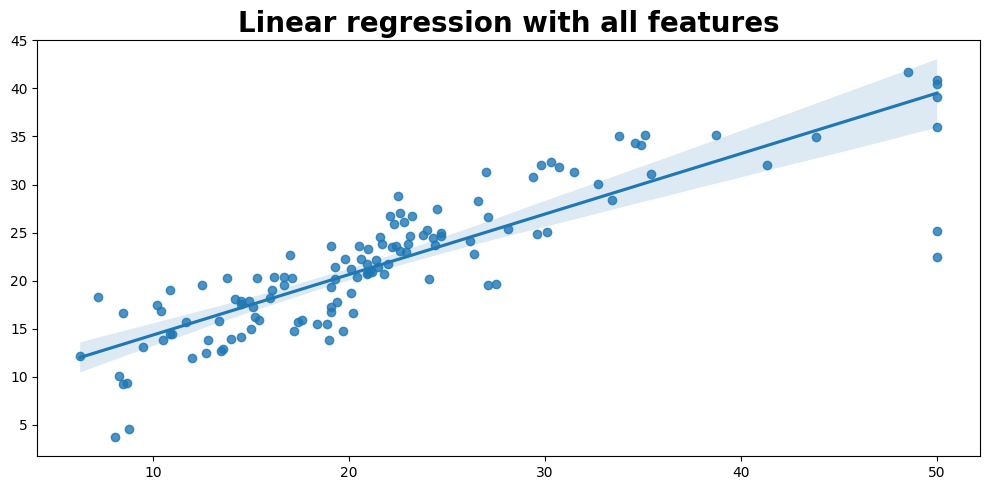

In [167]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression with all features', fontsize = 20,weight = 'bold')
plt.tight_layout()
plt.show()